In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats,integrate

# 不需要调用show方法便可以直接显示当前的绘图
%matplotlib inline

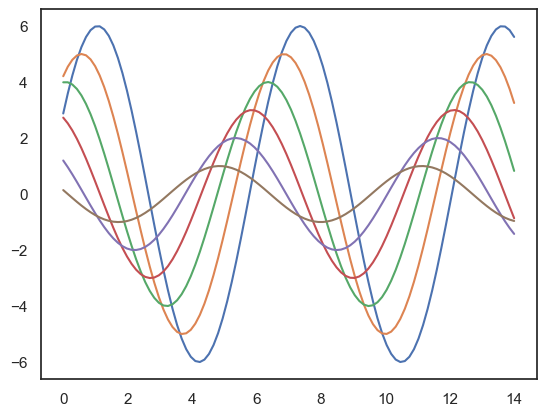

In [72]:
def sinplot(flip=1):
    # 创造100个随机数据
    x = np.linspace(0, 14, 100)
    # 画出六条图像
    for i in range(1,7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        
sns.set_style("white") #主题色
sinplot()

hls_palette() 函数来控制颜色的亮度和饱和

l-亮度 lightness<br>
s-饱和 saturation

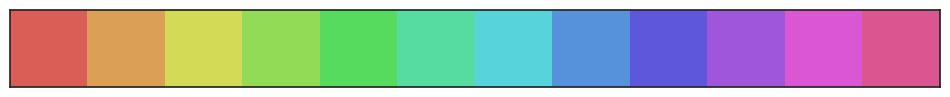

In [73]:
sns.palplot(sns.color_palette('hls', 12))

例如，我们来画一个简单的具有12列数据的箱线图：

<Axes: >

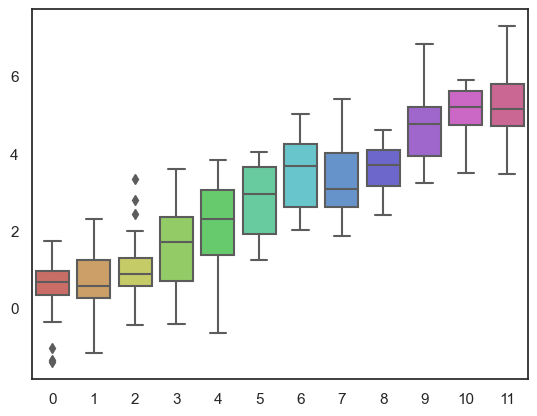

In [74]:
data = np.random.normal(size=(20, 12)) + np.arange(12) / 2
sns.boxplot(data=data,palette=sns.color_palette("hls", 12))

##### 连续色板
色彩随数据变换，比如数据越来越重要则颜色越来越深。要实现这种效果只需要在 color_palette 函数中传入想要实现渐变效果的颜色即可。

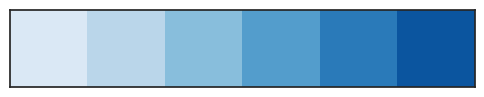

In [75]:
sns.palplot(sns.color_palette("Blues"))

当然，颜色也可以从深到浅进行变化，只需要在对应颜色的后面加入 _r即可

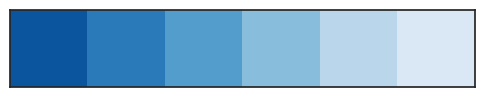

In [76]:
sns.palplot(sns.color_palette('Blues_r'))

##### 单指标数据
有时候对于一些数据来说，有时可能需要对数据的每一个属性进行分析，这种情况称为单变量分析。
而这种情况通常是利用**直方图**来进行展示
首先使用 numpy 中的随机来创建一些随机的符合高斯分布的数据：

C:\Users\ushop\AppData\Local\Temp\ipykernel_21092\2643498508.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=False)


<Axes: >

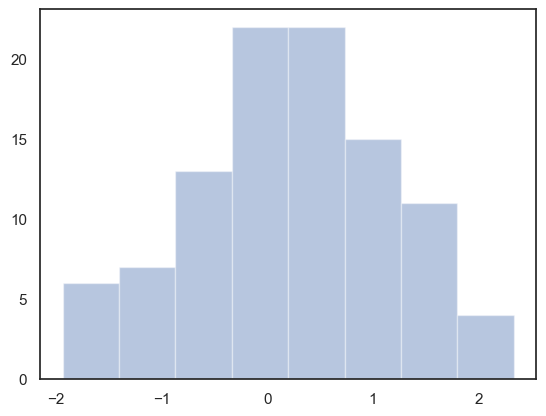

In [77]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False)

当然也可以显示高斯核密度，并且可以指定bins来将数据显示为多少列<br>
-x：表示所需要的数据集<br>
-bins：显示数据为多少个栏

C:\Users\ushop\AppData\Local\Temp\ipykernel_21092\2345270613.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=20)


<Axes: ylabel='Density'>

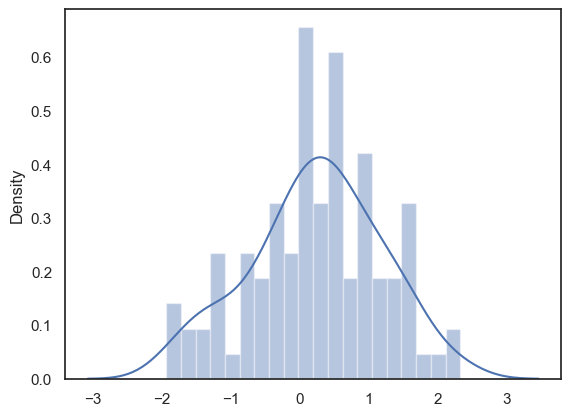

In [78]:
sns.distplot(x, bins=20)

当然对于一些符合某种分布的数据来说，也可以对其进行相应的数据操作，只需要指定拟合参数

C:\Users\ushop\AppData\Local\Temp\ipykernel_21092\771776858.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=False, fit=stats.gamma)


<Axes: >

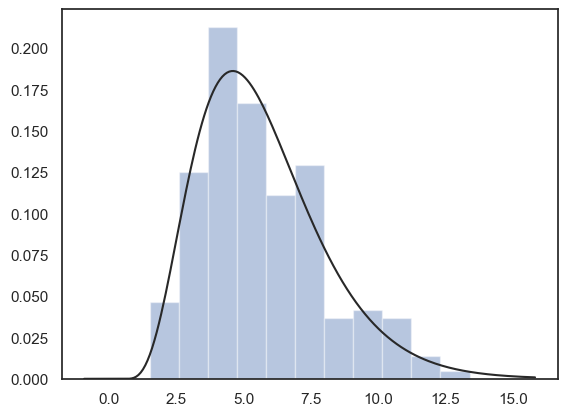

In [79]:
# 生成 gamma 分布数据
x = np.random.gamma(6, size=200)
# 使用fit 属性来拟合 gamma 曲线
sns.distplot(x, kde=False, fit=stats.gamma)

##### 双变量分析
有时需要对集中数据的两个属性之间进行分析，目前最好使用散点图和回归图来进行分析。

##### 散点图 jointplot
首先我们先先一些相关的数据，即指定均值和协方差使用np.random.multivariate_normal来创建200个服从正态分布的数据，并将其转变为DataFrame格式的数据

In [80]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])
df

,x,y
0,-0.100870,0.288863
1,-0.865716,1.822515
2,-0.588074,0.554071
3,0.274586,1.018681
4,-1.038608,1.636062
...,...,...
195,1.202674,1.058865
196,-1.165697,0.638135
197,0.091698,1.206487
198,-1.059967,0.505352


接下来使用散点图来获取这些数据：

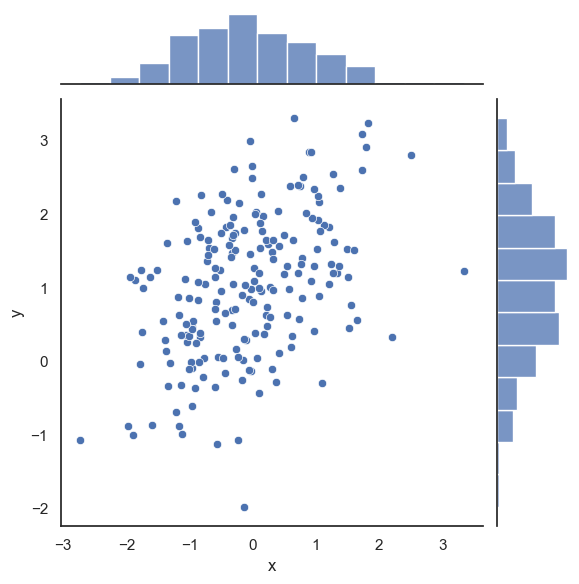

In [81]:
sns.jointplot(x='x', y='y', data=df)

上面的这种散点图的稀疏方式是适合于数据量比较少的情况下使用的，而对于数据量比较多的时候就得使用一些特殊的散点图了，改变散点图的格式使用的是善良的参数。

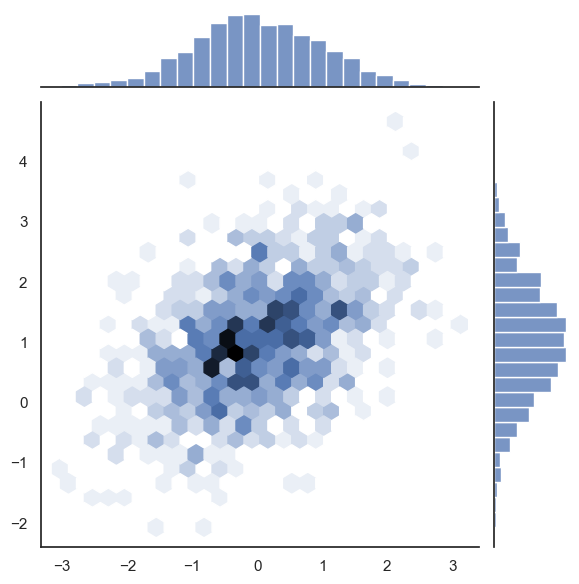

In [82]:
# 创建1000个数据
x, y = np.random.multivariate_normal(mean, cov, 1000).T

sns.jointplot(x=x, y=y, kind='hex')

<Axes: xlabel='year', ylabel='month'>

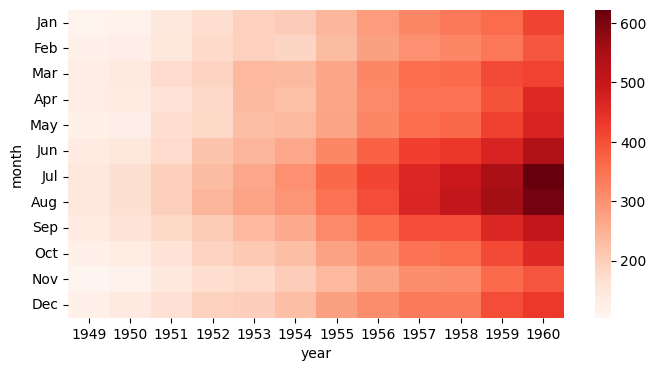

In [7]:
# 热力图6

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.figure(figsize=(8,4))

flights = sns.load_dataset("flights")

flights = flights.pivot("month", "year", "passengers")

# 使用不同的colormap进行颜色显示
sns.heatmap(flights, cmap="Reds")
# 将矩形数据绘制成颜色编码矩阵

<Axes: xlabel='year', ylabel='month'>

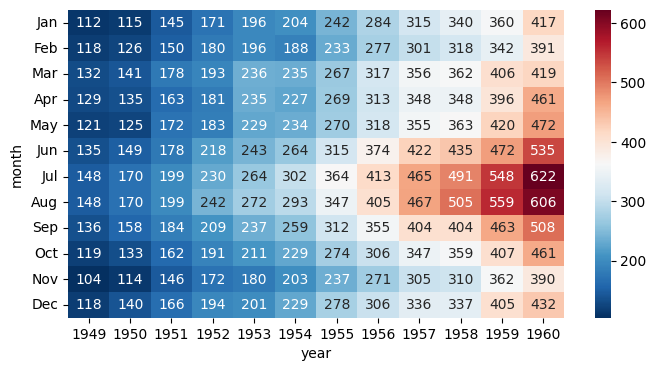

In [12]:
# 热力图6

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.figure(figsize=(8,4))

flights = sns.load_dataset("flights")

flights = flights.pivot("month", "year", "passengers")

# 使用不同的colormap进行颜色显示
sns.heatmap(data=flights,annot=True,fmt="d",cmap="RdBu_r")
# 将矩形数据绘制成颜色编码矩阵

<Axes: xlabel='year', ylabel='month'>

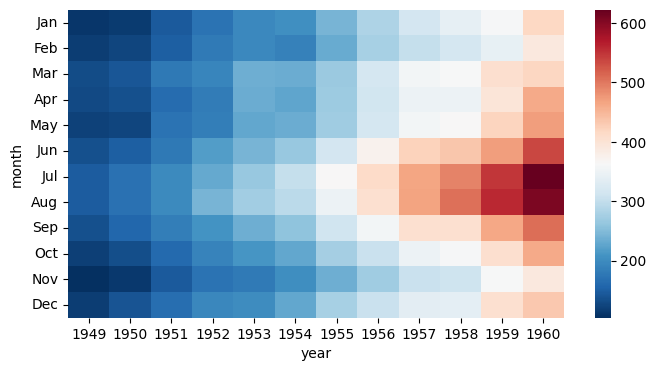

In [8]:
# 热力图6

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.figure(figsize=(8,4))

flights = sns.load_dataset("flights")

flights = flights.pivot("month", "year", "passengers")

# 使用不同的colormap进行颜色显示
sns.heatmap(flights, cmap="RdBu_r")
# 将矩形数据绘制成颜色编码矩阵

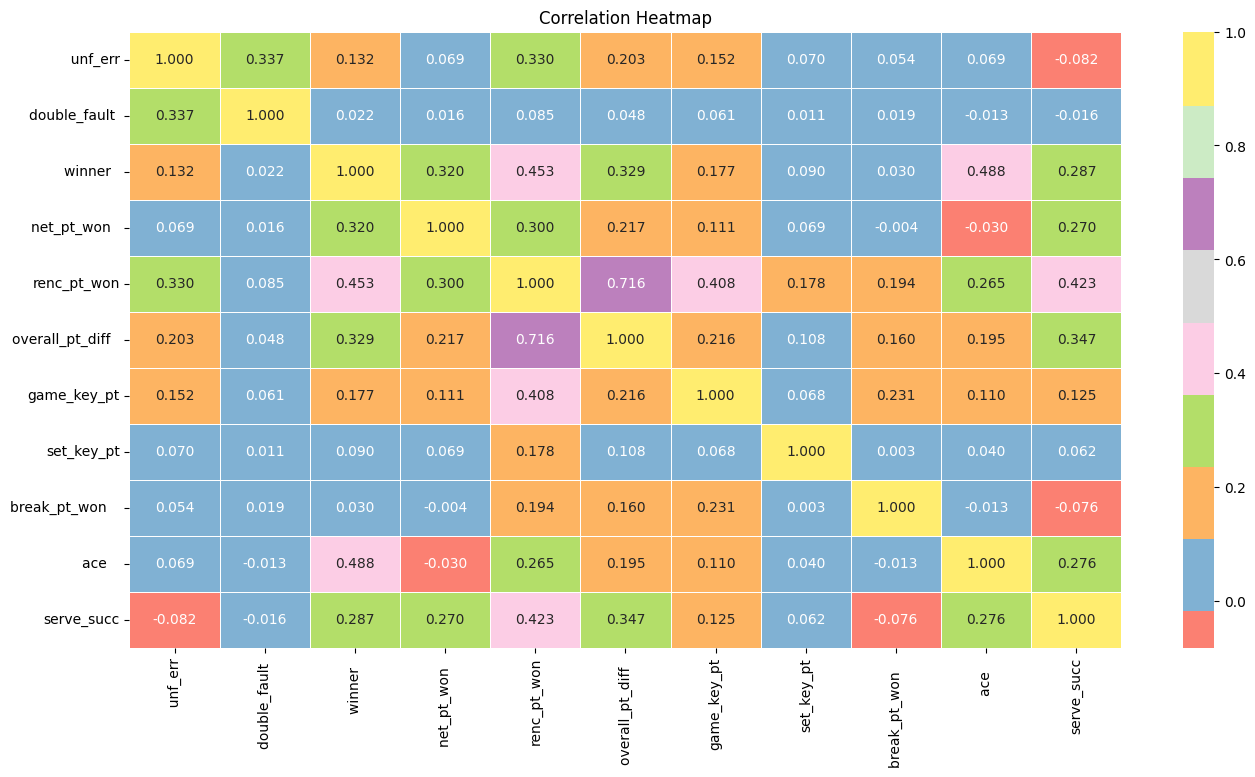

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'F:\Desktop\美赛_2024\ename.xlsx'
data = pd.read_excel(file_path, index_col=0)

# 取得第一行的前11个数作为横坐标和纵坐标标签
tick_labels = data.columns[:11]

# Create a heatmap using seaborn
plt.figure(figsize=(16, 8))  # 调整 figsize 参数，使图形为长方形
heatmap = sns.heatmap(data, annot=True, cmap=plt.get_cmap('Set3'), fmt='.3f', linewidths=.5, xticklabels=tick_labels, yticklabels=tick_labels, center=data.values.mean())

plt.title('Correlation Heatmap')
plt.show()


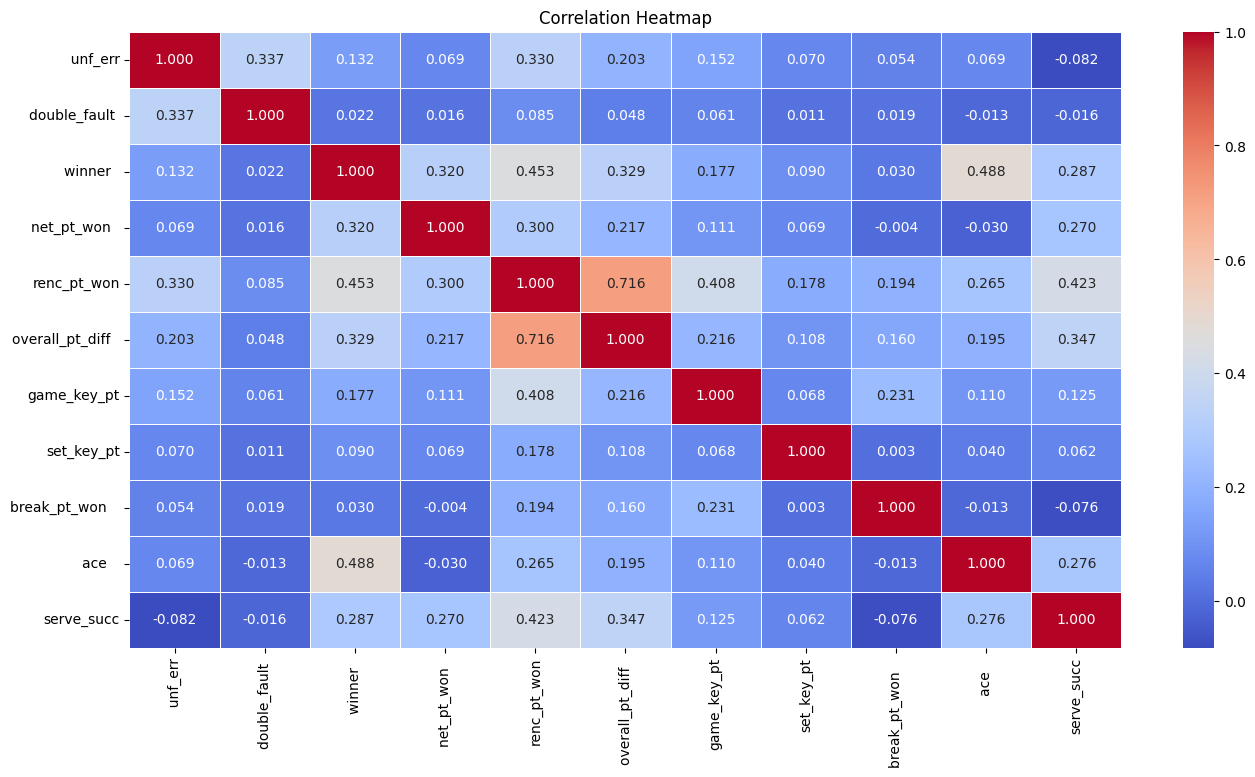

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'F:\Desktop\美赛_2024\ename.xlsx'
data = pd.read_excel(file_path, index_col=0)

# 取得第一行的前11个数作为横坐标和纵坐标标签
tick_labels = data.columns[:11]

# Create a heatmap using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5, xticklabels=tick_labels, yticklabels=tick_labels)
plt.title('Correlation Heatmap')
plt.show()


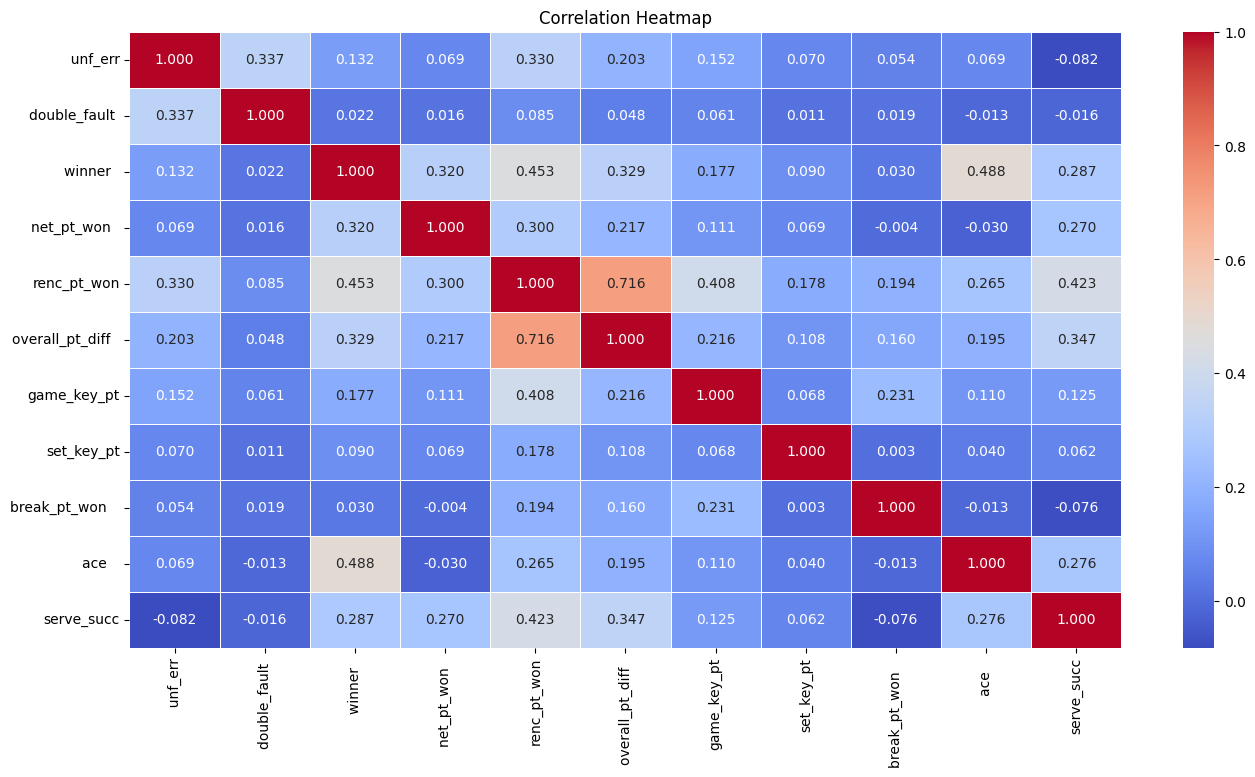

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'F:\Desktop\美赛_2024\ename.xlsx'
data = pd.read_excel(file_path, index_col=0)

# 取得第一行的前11个数作为横坐标和纵坐标标签
tick_labels = data.columns[:11]

# Create a heatmap using seaborn with 'coolwarm' colormap
plt.figure(figsize=(16, 8))
sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5, xticklabels=tick_labels, yticklabels=tick_labels)
plt.title('Correlation Heatmap')
plt.show()
